/home/gustavo/.virtualenvs/tf/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6967 - loss: 0.6080 - val_accuracy: 0.8660 - val_loss: 0.3995
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8973 - loss: 0.3426 - val_accuracy: 0.8544 - val_loss: 0.3498
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9255 - loss: 0.2402 - val_accuracy: 0.8840 - val_loss: 0.2978
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9427 - loss: 0.1879 - val_accuracy: 0.8852 - val_loss: 0.2980
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9540 - loss: 0.1489 - val_accuracy: 0.8956 - val_loss: 0.2679
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9642 - loss: 0.1257 - val_accuracy: 0.8948 - val_loss: 0.2758
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9703 - loss: 0.1045 - val_accuracy: 0.8782 - val_loss: 0.3331
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9755 - loss: 0.0883 - val_accuracy: 0.8924 - val

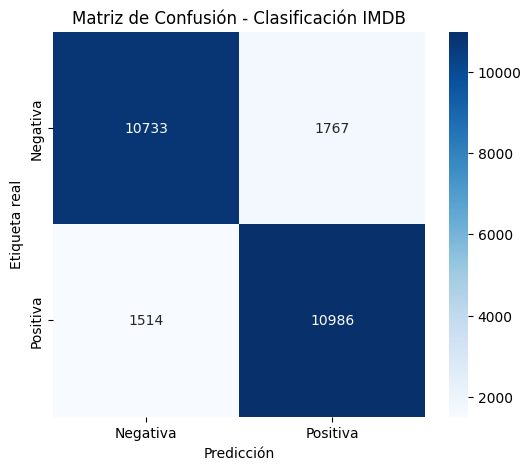


Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87     12500
         1.0       0.86      0.88      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000


--- Crítica #2 ---
<START> this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances austen's the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere rife with sexual tension and psychological trickery it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis

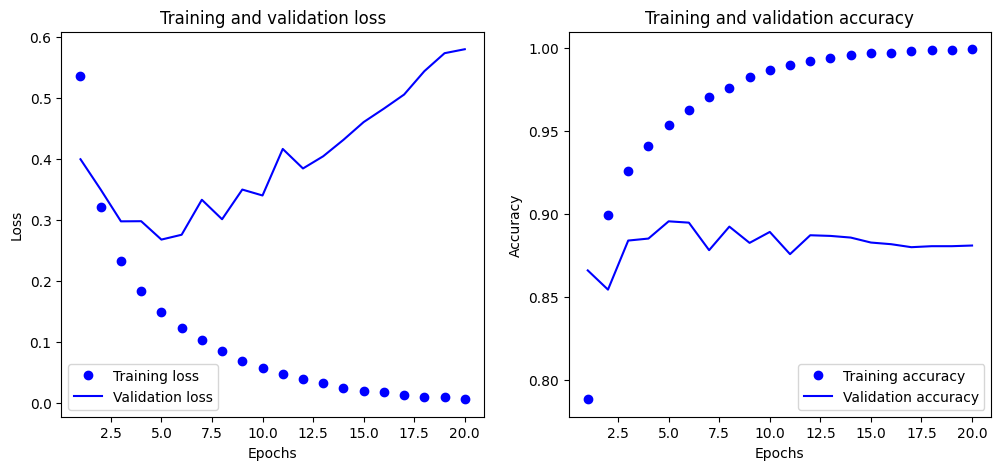

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Definir la cantidad de palabras a considerar en el dataset
num_words = 30000  # Puedes cambiar este valor fácilmente

# 1. Cargar el dataset IMDB con la cantidad de palabras definida
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Obtener el diccionario de palabras
word_index = imdb.get_word_index()
word_index = {k: (v + 3) for k, v in word_index.items()}  # Ajuste de índices
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # Desconocidas
word_index["<UNUSED>"] = 3
reverse_word_index = {v: k for k, v in word_index.items()}  # Invertir diccionario

# 2. Preprocesar los datos: convertir listas de enteros en tensores
def vectorize_sequences(sequences, dimension=num_words):
    results = np.zeros((len(sequences), dimension))  # Matriz de ceros
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0  # Poner 1 en los índices correspondientes a las palabras
    return results

x_train = vectorize_sequences(train_data, dimension=num_words)
x_test = vectorize_sequences(test_data, dimension=num_words)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# 3. Construir la red neuronal
model = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(num_words,)),  # Capa oculta 1
    layers.Dense(16, activation="relu"),  # Capa oculta 2
    layers.Dense(1, activation="sigmoid")  # Capa de salida (clasificación binaria)
])

# 4. Compilar el modelo
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# 5. Entrenar el modelo (validando con 20% de los datos de entrenamiento)
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.2)

# 6. Evaluar el modelo en el conjunto de prueba
results = model.evaluate(x_test, y_test)
print(f"Precisión en conjunto de prueba: {results[1]:.4f}")

# 7. Obtener predicciones y construir la matriz de confusión
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convertir probabilidades en 0 o 1

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negativa", "Positiva"], yticklabels=["Negativa", "Positiva"])
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión - Clasificación IMDB")
plt.show()

# 8. Mostrar reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# 9. Mostrar las dos primeras críticas del conjunto de prueba con más palabras reconocidas
def decode_review(text):
    return " ".join([reverse_word_index.get(i, "<UNK>") for i in text])

# Mostrar la primera y segunda crítica
for i in range(1,3):
    sample_review = decode_review(test_data[i])  # Convertir de enteros a palabras
    real_label = "Positiva" if test_labels[i] == 1 else "Negativa"
    predicted_label = "Positiva" if y_pred[i] == 1 else "Negativa"

    print(f"\n--- Crítica #{i+1} ---")
    print(sample_review)
    print(f"\nEtiqueta real: {real_label}")
    print(f"Predicción del modelo: {predicted_label}")

# 10. Graficar la pérdida y la precisión durante el entrenamiento
history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]

epochs = range(1, len(loss_values) + 1)

# Pérdida
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(epochs, acc_values, "bo", label="Training accuracy")
plt.plot(epochs, val_acc_values, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()
def highlight_important_words(model, review_vector, review_text):
    with tf.GradientTape() as tape:
        tape.watch(review_vector)
        prediction = model(review_vector)
    
    gradients = tape.gradient(prediction, review_vector).numpy().flatten()
    
    # Obtener las palabras con mayor importancia según los gradientes
    importance = np.abs(gradients)
    word_importance = {reverse_word_index.get(i, "<UNK>"): importance[i] for i in range(len(importance)) if i in reverse_word_index}
    
    # Ordenar palabras por importancia
    sorted_words = sorted(word_importance.items(), key=lambda x: x[1], reverse=True)
    
    # Seleccionar las palabras más importantes
    top_words = {word for word, _ in sorted_words[:10]}  # Top 10 palabras
    
    # Resaltar palabras clave en la crítica
    highlighted_review = " ".join([f"**{word}**" if word in top_words else word for word in review_text.split()])
    
    return highlighted_review